<a href="https://colab.research.google.com/github/KuzyaLakomkin1/DataAnalyst/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%A2%D1%80%D0%B5%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%BE%D1%87%D0%BD%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D1%81%D0%B1%D0%BE%D1%80%D1%83_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ссылка на облако с файлами
https://cloud.mail.ru/public/Hghv/copkPE88B

##Задание 1. Библиотека VK API

Напишите код, который получает список названия школ города Кемерово с помощью библиотеки vk_api и записывает результаты в файл JSON.

In [ ]:
#PyCharm Community Edition 2022.2.4
import vk_api
import json
from pprint import pprint

ACCES_TOKEN = "vk1.a.QancsiPLels4wNydZGMpvkA0vASrIxi8Uv_acFDH5ZfQmyf7oYKGWL7FUwyQLEqRD9p1HCN5G6EiwXrkmq0XFTRI90GF2b5SUHn23cfkLBdkwIus8bOEIaKv_FkKBRofJzP7MibtJImzFvfYBnrJZfVyX_72aO284yzTYdxr37Jt0J_u1wbtWZyaYDTcNsGD6tbB89Dn_lCbbgcg_kVuAQ"
vk_session = vk_api.VkApi(token=ACCES_TOKEN)
vk = vk_session.get_api()

if __name__ == "__main__":

    try:
        country_id = vk.database.getCities(country_id=1, q="Кемерово", count=1)['items'][0]['id']
        schools_info = vk.database.getSchools(access_token=ACCES_TOKEN, city_id=64)
        result_list = []
        items = schools_info["items"]
        for item in items:
            result_list.append({
                "title": item['title']})
        with open("task.json", "w") as f:
            result = {"result": result_list}
            json.dump(result, f, ensure_ascii=False)
            pprint(result)


    except Exception as ex:
        print(f"ERROR: {ex}")


Когда сдаёте  задания по VK API, можете не переживать за сохранность токена (кроме тьюторов никто решение не увидит). Однако при желании можете удалить свой токен (тьюторы в любом случае проверят сданное задание).

### Возможный алгоритм решения задачи:

1.   Получаем токен доступа к API Вконтакте
2.   Инициализируем сессию библиотеки VK_API с помощью токена доступа
3. Получаем доступ с помощью VK_API к API «ВКонтакте» методом get_api
4. Следуя методу из документации для получения городов и используя библиотеку VK_API, составляем запрос на получение информации о городе «Кемерово» и получаем его id из ответа на запрос
5. Следуя методу из документации для получения школ и используя библиотеку VK_API, составляем запрос на получение информации о школах города «Кемерово» (по найденному id) и получаем список названия школ
10. Конкретный формат не указан, поэтому создаем JSON с удобными ключами.<br>Например: result: {schools: [...]}
11. Записываем созданный  словарик  в файл с форматом JSON





##Задание 2. Запись данных в CSV формат

С помощью методов API «ВКонтакте» получите 1000 подписчиков группы «Лентач», отсортирванных по дате регистрации ВКонтакте (не дата вступления в сообщество).

Вам необходимо собрать следующие данные в CSV файл: пол, название город, семейное положение (ФИО партнера не указывать).

In [ ]:
#PyCharm Community Edition 2022.2.4
import vk_api
import csv

ACCES_TOKEN = "vk1.a.QancsiPLels4wNydZGMpvkA0vASrIxi8Uv_acFDH5ZfQmyf7oYKGWL7FUwyQLEqRD9p1HCN5G6EiwXrkmq0XFTRI90GF2b5SUHn23cfkLBdkwIus8bOEIaKv_FkKBRofJzP7MibtJImzFvfYBnrJZfVyX_72aO284yzTYdxr37Jt0J_u1wbtWZyaYDTcNsGD6tbB89Dn_lCbbgcg_kVuAQ"
vk_session = vk_api.VkApi(token=ACCES_TOKEN)
vk = vk_session.get_api()

if __name__ == "__main__":
    try:
        group_id = vk.groups.search(token=ACCES_TOKEN, q="Лентач")["items"][0]["id"]
        group_members = vk.groups.getMembers(token=ACCES_TOKEN, group_id=29534144, fields=['sex', 'city', 'personal'])
        print(group_id)

        with open('lentach_members.csv','w', encoding='utf-8') as file:
          writer = csv.writer(file)
          writer.writerow(['ID', 'First Name', 'Last Name', 'Sex', 'City'])
          for member in group_members['items']:
            writer.writerow([member['id'], member['first_name'], member['last_name'], member['sex'],
                             member['city']['title'] if 'city' in member else ""])
    except Exception as ex:
        print(f"ERROR{ex}")


Когда сдаёте  задания по VK API, можете не переживать за сохранность токена (кроме тьюторов никто решение не увидит). Однако при желании можете удалить свой токен (тьюторы в любом случае проверят сданное задание).

### Возможный алгоритм решения задачи:

1. Получаем токен доступа к API Вконтакте
2. Инициализируем сессию библиотеки VK_API с помощью токена доступа
3. Получаем доступ с помощью VK_API к API вконтакте методом get_api
4. Следуя методу из документации для получения сообществ и используя библиотеку VK_API, составляем запрос на получение информации о сообществе «Лентач» и получаем его id из ответа на запрос
5. Следуя методу (getMembers) из документации для получения участников сообщества и используя библиотеку VK_API, составляем запрос на получение информации о участниках сообщества «Лентач» (по найденному id) и получаем пол, город и СП каждого из участников
6. С помощью CSV библиотеки записываем полученные данные в файл с форматом csv





##Задание 3. Скрещиваем Selenium и BeautifulSoup

Соберите информацию с сайта nbcomputers.ru (https://www.nbcomputers.ru/catalog/noutbuki/) о ноутбуках данного интернет-магазина.
<br>
Данные, которые необходимы:
* Название ноутбука
* Цена ноутбука
* Код товара

Результат необходимо записать в CSV файл.
<br>
*(совет: обязательно делайте различные временные промежутки между прокликами)*

In [ ]:
#PyCharm Community Edition 2022.2.4
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

try:
    driver.get('https://www.nbcomputers.ru/catalog/noutbuki/')
    driver.implicitly_wait(10)
    actions = ActionChains(driver)
    wait = WebDriverWait(driver, timeout=5)
    btn_show_more = driver.find_element(By.CSS_SELECTOR, "button.sc-47746e2f-0.ksEKWt")
    actions.move_to_element(btn_show_more)
    actions.perform()
    while True:
        wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'button.sc-47746e2f-0.ksEKWt'))).click()



except Exception as ex:
    print(f'Error: {ex}')

html = driver.page_source
print(html)
driver.quit()

In [ ]:
#PyCharm Community Edition 2022.2.4
import requests
from bs4 import BeautifulSoup
from time import sleep
import lxml
import csv

URL = "https://www.nbcomputers.ru/catalog/noutbuki/"

session = requests.session()
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
                  "(KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36",
    "Accept-Language": "ru,en;q=0.9,en-US;q=0.8,ru-RU;q=0.7"
}
response = session.get(URL, headers=headers)
html = response.text

soup = BeautifulSoup(html, "lxml")

all = soup.find_all('article', class_='sc-ba83ea5a-0 dXYWyV')

with open('nbcomputers.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Name', 'Code', 'Price'])
    for data in all:
        name = data.find('div', class_='sc-ba83ea5a-15 bXzchn').text.strip()
        code = data.find('div', class_='sc-ba83ea5a-10 gdFLFg').find('p').text.strip()
        price = data.find('span', class_='sc-96470d6e-2 gaNDhP').text.strip()
        writer.writerow([name, code, price])


In [ ]:
# Данный скрипт собирает только 31 товар(Т.е с первой страницы).Не могу понять почему,скрипт нажимает кнопку показать ещё.Прошу помочь разобраться и внести корректировки .


from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import lxml
import csv


driver = webdriver.Chrome()

driver.get('https://www.nbcomputers.ru/catalog/noutbuki/')
driver.implicitly_wait(10)
wait = WebDriverWait(driver, 5)

a = 1
while a < 25:
    try:
        button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button.sc-47746e2f-0.ksEKWt"))).click()
        a += 1

    except Exception as ex:
        print(f'Error: {ex}')

html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
all = soup.find_all('article', class_='sc-ba83ea5a-0 dXYWyV')

with open('nbcomputers.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Name', 'Code', 'Price'])
    for data in all:
        name = data.find('div', class_='sc-ba83ea5a-15 bXzchn').text.strip()
        code = data.find('div', class_='sc-ba83ea5a-10 gdFLFg').find('p').text.strip()
        price = data.find('span', class_='sc-96470d6e-2 gaNDhP').text.strip()
        writer.writerow([name, code, price])



### Возможный алгоритм решения задачи в Colab (простой):

Возможный алгоритм решения задачи в коллабе (простой):
1. Установливаем параметры для headless браузера
2. Инициализацируем сессию браузера
3. Переходим по данной ссылке
4. Устанавливаем неявное ожидание
5. Инициализируем явное ожидание для нажатия на кнопку "Больше"
6. С помощью бесконечного цикла жмем на кнопку методом click, пока она кликабельна  (ну и не забываем про селектор)
4. Оборачиваем все в trt except.Когда вылетит с ошибкой того, что кнопка не кликабельна => прогрузили все карточки

5. С помощью BS находим блок карточек
6. Поочереднно собираем необходимые данные с карточки
7. Записываем все в файл с форматом csv, используя CSV библиотеку



##Задание 4. Фреймворк Scrapy

Соберите информацию о заквасках с сайта pro-syr.ru (https://pro-syr.ru/zakvaski-dlya-syra/mezofilnye/)

Необходимо собрать следующие данные:
* Название продукта
* Цена
* Есть ли продукт в наличии

Результат должен быть записан в CSV файл

In [ ]:
import scrapy
import time

class leavenSpider(scrapy.Spider):
  name = 'leavenSpider'
  start_urls = ['https://pro-syr.ru/zakvaski-dlya-syra/mezofilnye/']

  def parse(self, response):
    links = response.css('div.nameproduct a::attr(href)')
    for link in links:
      time.sleep(1)
      yield response.follow(link, self.parse_cheese)

    link = response.css('ul.pagination a::attr(href)').get()
    yield response.follow(link, self.parse)

  def leavenSpider(self, response):
    yield {
        'name': response.css('div.col-md-9 h1::text').get(),
        'price': response.css('li.price span::text').get(),
        'stock': response.css('div.product-description b::text').get()
    }




In [ ]:
scrapy crawl "leavenSpider" -o "leaven.csv"

### Возможный алгоритм решения задачи:

1. Инициализируем проект SCRAPY
2. В папке spiders создаем своего паука
3. Создаем класс с пауком и наследуемся от scrapy.Spider
4. Называем паука так же, как и класс
5. Указываем стартовую ссылку
6. Создаем функцию парсинга карточки, где описываем получение данных из карточки в словарь (название, цена и запас). Возвращаем обратно словарь через yield.
7. Создаем функцию parse — основую логику перехода по ссылкам
8. Получаем ссылки на каждую карточек текущей страницы
9. Циклом проходимся по каждой и собираем данные через ранне коллбек функцию
10. Дальше в функции parse расписываем переход на следующую страницу. Для этого находим в пагинации ссылку на следующую страницу  и переходим на нее до тех пор, пока она не закончится.
11. В командной строке переходим в папку с проектом scrapy (%cd <название проекта>/)
12. В командной строке пишем команду !scrapy runspider <название паука или путь до него из папки с проектом> -o <Название файла с форматом csv, куда будет записан результат парсинга>


Не забывайте пользоваться scrapy shell!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Дополнительно (по желанию)**

##Задание. Собираем данные с помощью Requests

С помощью методов API ВКонтакте получите список высших учебных заведений и названия их факультетов в городе Томск.
Результат должен быть записан в файл JSON в следующем формате:

In [ ]:
"result": {
  "cities": [
    {
        "id": <ID города>,
        "name": <Название города>,
        "universites": [
            {
              "id": <ID ВУЗа>,
              "name": <Название ВУЗа>
              "faculties": [<Название факультета>, …]
            },
            ...
        ]
    },
    ...
}

Когда сдаёте  задания по VK API, можете не переживать за сохранность токена (кроме тьюторов никто решение не увидит). Однако при желании можете удалить свой токен (тьюторы в любом случае проверят сданное задание).

### Возможный алгоритм решения задачи:

1.   Получаем токен доступа к API Вконтакте
2.   Настраиваем подключение к API Вконтакте  и устанавливаем базовые параметры (токен и версия) GET запроса

---

3. Следуя методу из документации для получения городов и используя библиотеку requests, составляем запрос на получение информации о городе «Томск» и получаем его id и название из ответа на запрос

---
4. Следуя методу из документации для получения университетов и используя библиотеку requests, составляем запрос на получение информации о университетах города «Томск» (по найденному id) и получаем список университетов
5. Из полученного списка университетов получаем id и название каждого
6. Список id и названия университетов записываем в словарь с информацией о найденном городе под ключем 'universites'
---

7. Находим метод получения факультетов университета в документации API Вконтакте
8. Через цикл по каждому id университета, составляем запрос на получение информации о факультете университета (по найденному id) и получаем список названий факультетов
9. В этом же цикле записываем под ключем 'faculties' полученный список
---
10. Создаем финальный словарь с ключем 'result', значение которого будет еще один словарь 'cities' со значением созданного нами словаря с информацией о городе-университетах-факультетах
11. Записываем наш словарь в  файл с форматом JSON





Пример решения задачи-аналога: https://colab.research.google.com/drive/1kvqcs1R8oRueCa_EajNXdV4w1qr6DCgA?usp=sharing

##Задание. Библиотека BeautifulSoup

Написать код, который соберет список знаменательных дат в формате «чисто месяц год» с первой страницы сайта GCTC.ru (https://www.gctc.ru/main.php?id=98.1)

### Возможный алгоритм решения задачи:

1. Устанавливаем bs4
2. Здесь lxml неправильно декодирует html в дерево супа (это можно узнать путем проб и ошибок)
3. Устанавливаем любой другой парсер и проверяем, что он нормально декодирует (html5lib подходит)

4. С помощью requests инициализируем сессию, используя указанную ссылку, и устанавливем заголовки
5. Получаем из проинициализированной сессии text и варим суп
6. Получаем главный блок с помощью селектора из которого нужно достать данные
7. Получаем все теги h2, которые содержат год
8. Создаем результативный массив и в цикле по каждому тегу h2 будем записывать в него полученный результат
9. В цикле обрезаем .г у года, получаем ОДИН h1, который был до div.news h2 с помощью метода find_previous (это и есть день и месяц события)
10. Получаем дату+месяц, где первые два символа это день, а остальные символы это название месяца
11. Записываем все в результативный массив


Не забываем все обернуть в try except и проверять с помощью raise_for_status

##Задание. Библиотека Selenium

Написать код, который выполнит ввод слова «Lenovo» в поисковую строку сайта  nbcomputers.ru (https://www.nbcomputers.ru/) и начнет поиск
<br>
<br>
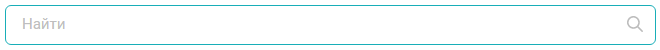

*(подсказка: изучите внимательно документацию и методы wait.until, click или send_keys)*

### Возможный алгоритм решения задачи:

Возможный алгоритм решения задачи в коллабе (простой):
1. Установливаем параметры для headless браузера
2. Инициализацируем сессию браузера
3. Переходим по данной ссылке
4. Находим элемент по селектору
5. С помощью метода send_keys и \n в конце строки (\n имитирует нажатие кнопки Enter) выполняем поиск

Более сложный  и верный с использованием ожиданий
